In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1. a. We toss a fair coin many times and count heads/tails. The proportion of heads and tails gives us the experimental probability.

In [9]:
# Simulate tossing a coin 10,000 times
trials = 10000
heads = 0
tails = 0

for _ in range(trials):
    toss = random.choice(["H", "T"])
    if toss == "H":
        heads += 1
    else:
        tails += 1

# Calculate experimental probabilities
p_heads = heads / trials
p_tails = tails / trials

print(f"Heads Probability: {p_heads:.4f}")
print(f"Tails Probability: {p_tails:.4f}")


Heads Probability: 0.4969
Tails Probability: 0.5031


1. b. We roll two dice and count how often the sum equals 7. The frequency over total trials gives the probability.

In [11]:
# Simulate rolling two dice
trials = 10000
count_sum7 = 0

for _ in range(trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        count_sum7 += 1

p_sum7 = count_sum7 / trials
print(f"Probability of sum = 7: {p_sum7:.4f}")


Probability of sum = 7: 0.1740


2. We roll a die 10 times in each trial and check if at least one roll is 6. The proportion of such trials gives the estimated probability.

In [12]:
def probability_at_least_one_six(trials=10000):
    success_count = 0

    for _ in range(trials):
        rolls = [random.randint(1, 6) for _ in range(10)]
        if 6 in rolls:
            success_count += 1

    return success_count / trials

p_one_six = probability_at_least_one_six()
print(f"Probability of at least one '6' in 10 rolls: {p_one_six:.4f}")


Probability of at least one '6' in 10 rolls: 0.8356


3. We record sequences of ball colors. The conditional probability P(Red | Previous was Blue) is computed directly. Then we verify Bayes’ theorem using simulated frequencies.

In [13]:
colors = ["R"]*5 + ["G"]*7 + ["B"]*8
trials = 1000
sequence = []

# Simulate draws with replacement
for _ in range(trials):
    ball = random.choice(colors)
    sequence.append(ball)

# Count conditional probability: P(Red | Previous was Blue)
count_blue_then_red = 0
count_prev_blue = 0

for i in range(1, len(sequence)):
    if sequence[i-1] == "B":
        count_prev_blue += 1
        if sequence[i] == "R":
            count_blue_then_red += 1

p_red_given_blue = count_blue_then_red / count_prev_blue
print(f"P(Red | Previous Blue): {p_red_given_blue:.4f}")

# Bayes Theorem Verification
# P(R|Bprev) ≈ (P(Bprev|R) * P(R)) / P(Bprev)
p_R = sequence.count("R") / trials
p_Bprev = count_prev_blue / (trials - 1)

# P(Bprev|R)
count_R = sequence.count("R")
count_R_with_prev_B = sum(1 for i in range(1, trials) if sequence[i] == "R" and sequence[i-1] == "B")
p_Bprev_given_R = count_R_with_prev_B / count_R

bayes_p = (p_Bprev_given_R * p_R) / p_Bprev
print(f"Bayes Theorem Result: {bayes_p:.4f}")


P(Red | Previous Blue): 0.2748
Bayes Theorem Result: 0.2746


4. We generate values according to the given probability distribution, then calculate mean, variance, and standard deviation using NumPy.

In [14]:
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.40]

sample = np.random.choice(values, size=1000, p=probabilities)

mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print(f"Mean: {mean:.4f}")
print(f"Variance: {variance:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")


Mean: 2.1240
Variance: 0.6326
Standard Deviation: 0.7954


5. We simulate exponential random variables and plot their histogram with the theoretical probability density function.

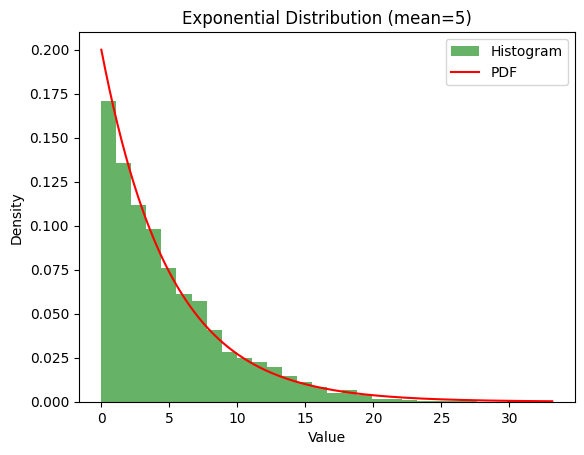

In [15]:
# Mean = 5, so scale parameter (1/lambda) = 5
samples = np.random.exponential(scale=5, size=2000)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label="Histogram")

# Plot PDF overlay
x = np.linspace(0, max(samples), 1000)
pdf = (1/5) * np.exp(-x/5)
plt.plot(x, pdf, 'r', label="PDF")

plt.title("Exponential Distribution (mean=5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


6. The uniform data is flat, but the distribution of sample means is approximately normal, illustrating the Central Limit Theorem.

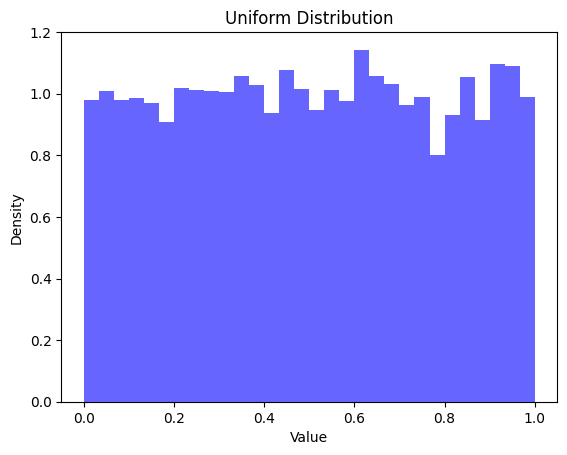

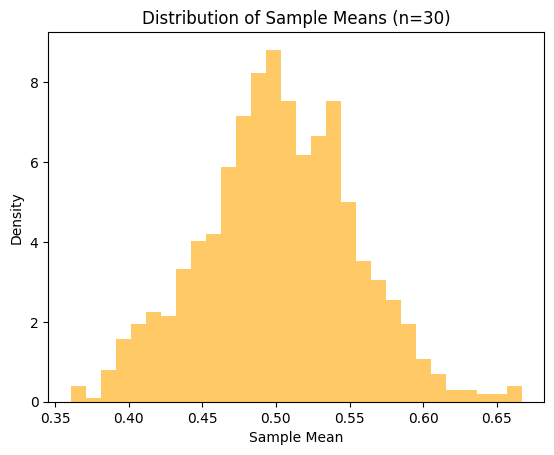

In [16]:
# Generate 10,000 uniform random numbers
uniform_data = np.random.uniform(0, 1, 10000)

# Take 1000 samples of size n=30 and compute means
sample_means = []
for _ in range(1000):
    sample = np.random.choice(uniform_data, size=30)
    sample_means.append(np.mean(sample))

# Plot uniform distribution
plt.hist(uniform_data, bins=30, density=True, alpha=0.6, color='b')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Plot distribution of sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='orange')
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()
